# Salary Prediction and Analysis using K- Nearest Model

* K-nearest neighbors (KNN) is a type of supervised learning algorithm used for both regression and classification. 
* KNN tries to predict the correct class for the test data by calculating the distance between the test data and all the training points. 
* Then select the K number of points which is closet to the test data.

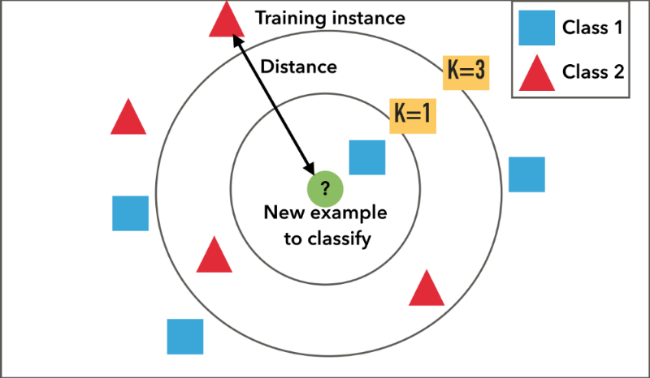

**Creator**: Anandan Raju

**Synopsis**

1. Import Packages
2. Load Dataset
3. Summarize DataSet
4. Mapping Salary Data to Binary Value
5. Segregate Dataset into X & Y
6. Feature Selection
7. Splitting Dataset into Train & Test
8. Feature Scaling
9. Training
10. Prediction
11. Accuracy Score
12. Prediction Output

**1. Import Packages**

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

**2. Load Dataset**

In [3]:
sal = pd.read_csv('salary.csv')
print(sal.info())
sal

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   education.num   32561 non-null  int64 
 2   capital.gain    32561 non-null  int64 
 3   hours.per.week  32561 non-null  int64 
 4   income          32561 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.2+ MB
None


,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K
...,...,...,...,...,...
32556,22,10,0,40,<=50K
32557,27,12,0,38,<=50K
32558,40,9,0,40,>50K
32559,58,9,0,40,<=50K


In [4]:
sal.describe()

,age,education.num,capital.gain,hours.per.week
count,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,40.437456
std,13.640433,2.572720,7385.292085,12.347429
min,17.000000,1.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,99.000000


**3. Summarize DataSet**

In [5]:
print(sal.shape)
sal.head()

(32561, 5)


,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K


**4. Mapping Salary Data to Binary Value**

In [6]:
sal['income']=sal['income'].map({'<=50K':0,'>50K':1}).astype(int)
sal

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,0
1,82,9,0,18,0
2,66,10,0,40,0
3,54,4,0,40,0
4,41,10,0,40,0
...,...,...,...,...,...
32556,22,10,0,40,0
32557,27,12,0,38,0
32558,40,9,0,40,1
32559,58,9,0,40,0


**5. Segregate Dataset into X & Y**

 * X = Input/Inpendent Variable
 * Y = Inpu/Dependent Variable

In [7]:
x=sal.iloc[:,:-1]
x

,age,education.num,capital.gain,hours.per.week
0,90,9,0,40
1,82,9,0,18
2,66,10,0,40
3,54,4,0,40
4,41,10,0,40
...,...,...,...,...
32556,22,10,0,40
32557,27,12,0,38
32558,40,9,0,40
32559,58,9,0,40


In [8]:
x=sal.iloc[:,:-1].values
x

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]], dtype=int64)

In [9]:
y=sal.iloc[:,-1]
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int32

In [10]:
y=sal.iloc[:,-1].values
y

array([0, 0, 0, ..., 1, 0, 0])

**6. Feature Selection**

In [11]:
from sklearn.feature_selection import RFE   #Regressive Feature Extraction
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
rfe=RFE(model,n_features_to_select=5)
rfe=rfe.fit(x,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True]
[1 1 1 1]


**7. Splitting Dataset into Train & Test**

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

**8. Feature Scaling**

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

**9. Training**

In [14]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=4,metric='minkowski',p=2) #Euclidean Point(distance)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

[0.25635671293452894, 0.20353764893747697, 0.20722269991401548, 0.19764156737501534, 0.19997543299348974, 0.19149981574745117, 0.19567620685419482, 0.18720058960815625, 0.18806043483601523, 0.18597223928264342, 0.18916595012897677, 0.1890431150964255, 0.19186832084510502, 0.18597223928264342, 0.1874462596732588, 0.18572656921754085, 0.18498955902223313, 0.18474388895713056, 0.1854808991524383, 0.1837612086967203, 0.1837612086967203, 0.18216435327355363, 0.18400687876182287, 0.18388404372927158, 0.18437538385947672, 0.1822871883061049, 0.18277852843631004, 0.18191868320845106, 0.18118167301314334, 0.18105883798059205, 0.18216435327355363, 0.18130450804569465, 0.18326986856651517, 0.18179584817589978, 0.18204151824100234, 0.18130450804569465, 0.1806903328829382, 0.18032182778528436, 0.18179584817589978]


Text(0, 0.5, 'Mean Error')

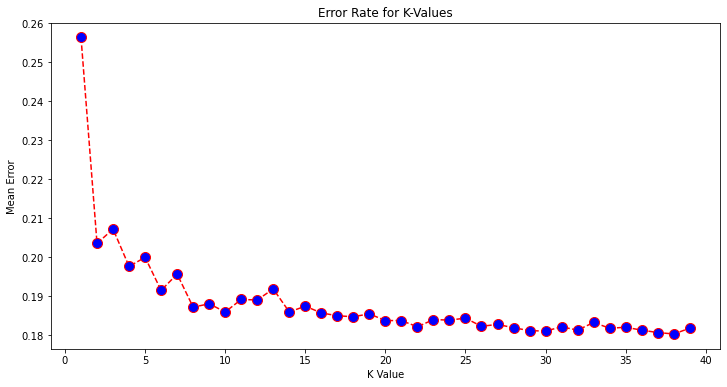

In [15]:
error=[]
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
for i in range(1,40):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    pred_i=model.predict(x_test)
    error.append(np.mean(pred_i != y_test))
print(error)
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate for K-Values')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

**10. Prediction**

In [16]:
y_pred=model.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[5797,  352],
       [1128,  864]], dtype=int64)

<AxesSubplot:>

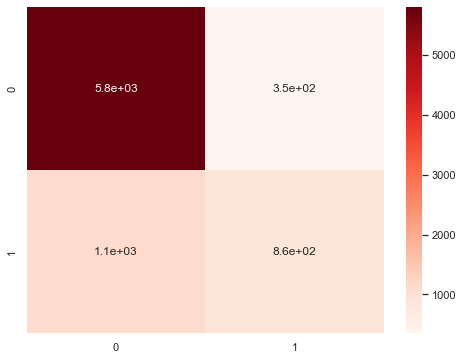

In [28]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.heatmap(cm,annot=True,cmap='Reds')

**11. Accuracy Score**

**Accuracy = (TP + TN)/(TP+TN+FP+FN)**

In [19]:
Accuracy = (5797+864)/(5797+352+1128+864)
Accuracy

0.8182041518241002

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score
acc_score=accuracy_score(y_test,y_pred)
print(f'Accuracy of the Model: {(acc_score*100)//1} %')

Accuracy of the Model: 81.0 %


**12. Prediction Output**
>Predicting whether new employee with Age & Hours per week will get salary above 50K or Not

In [22]:
age=int(input('Enter New Employee Age: '))
edu=int(input('Enter New Employee Education: '))
wor_hrs=int(input('Enter New Employee Work in Hours Per Week: '))
cap_gain=int(input('Enter New Employee Capital Gain: '))
newEmp=[[age,edu, cap_gain,wor_hrs]]
result=model.predict(sc.transform(newEmp))
print(result)
if result==1:
    print('Employee might got Salary above 50K')
else:
    print('Employee might got Salary below 50K')

Enter New Employee Age: 45
Enter New Employee Education: 10
Enter New Employee Work in Hours Per Week: 28
Enter New Employee Capital Gain: 20000
[1]
Employee might got Salary above 50K


                                                Copyright © Anandan_Raju